In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

## EDA

In [2]:
df=pd.read_csv("/Users/rohithsiddi/Desktop/Chemical_Intelligence/Train_Data_Final.csv")
test=pd.read_csv("/Users/rohithsiddi/Desktop/Chemical_Intelligence/Test_Data.csv")

In [3]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,RH_type,id
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,0.757754,Ideal,1
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,0.725487,Ideal,2
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,0.750239,Slightly Elevated,3
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,0.786713,Slightly Elevated,4
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,0.788794,Slightly Elevated,5


In [4]:
test.head()

,Unnamed: 0,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,id
0,8000,2005-02-07,02:00:00,0.8,863.00,-200,1.504175,545.00,85.6,1119.25,78.4,748.75,483.50,4.325,0.320679,1
1,8001,2005-02-07,03:00:00,0.6,860.75,-200,1.200205,518.25,-200.0,1140.75,-200.0,737.50,481.50,3.875,0.325031,2
2,8002,2005-02-07,04:00:00,0.6,852.25,-200,0.831325,481.50,66.6,1186.50,65.1,725.75,496.00,3.800,0.332693,3
3,8003,2005-02-07,05:00:00,0.6,879.25,-200,0.962585,495.25,75.1,1146.50,72.5,752.75,622.75,3.300,0.349882,4
4,8004,2005-02-07,06:00:00,0.6,899.50,-200,1.268602,524.50,96.9,1090.00,84.6,780.25,695.75,3.650,0.357384,5


In [5]:
df.shape

(8000, 16)

In [6]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,id
count,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000
mean,-39.616450,1051.229542,-152.15075,2.853485,911.693740,149.083150,810.813437,45.164963,1445.371906,979.734292,11.542394,-6.182181,4000.50000
std,81.895617,324.514858,150.07985,39.972683,339.978463,260.591289,321.352129,129.313917,455.400332,449.183717,41.830243,37.526459,2309.54541
min,-200.000000,-200.000000,-200.00000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,1.00000
25%,0.500000,917.000000,-200.00000,4.293956,726.750000,39.000000,651.937500,44.000000,1275.187500,709.937500,12.325000,0.779140,2000.75000
50%,1.500000,1051.250000,-200.00000,8.279845,910.625000,122.000000,806.750000,90.000000,1493.375000,942.000000,18.700000,1.031560,4000.50000
75%,2.600000,1225.000000,-200.00000,14.152558,1121.562500,259.175000,975.500000,125.000000,1697.750000,1253.437500,25.125000,1.358336,6000.25000
max,11.900000,2039.750000,1189.00000,63.741476,2214.000000,1479.000000,2682.750000,332.600000,2775.000000,2522.750000,44.600000,2.231036,8000.00000


In [7]:
df.drop("id",axis=1,inplace=True)
test.drop(["id","Unnamed: 0"],axis=1,inplace=True)

In [8]:
#Using datetime to extract data individually

df["Date"]=pd.to_datetime(df["Date"])      
test["Date"]=pd.to_datetime(test["Date"])

In [9]:
df["Date"]

0      2004-03-10
1      2004-03-10
2      2004-03-10
3      2004-03-10
4      2004-03-10
          ...    
7995   2005-02-06
7996   2005-02-06
7997   2005-02-06
7998   2005-02-07
7999   2005-02-07
Name: Date, Length: 8000, dtype: datetime64[ns]

In [10]:
#Extracting month,year,day using datetime

df["Month"]=df["Date"].dt.month     
df["Year"]=df["Date"].dt.year
df["Day"]=df["Date"].dt.day

In [11]:
test["Month"]=test["Date"].dt.month
test["Year"]=test["Date"].dt.year
test["Day"]=test["Date"].dt.day

In [13]:
df["Time"]=pd.to_datetime(df["Time"])
test["Time"]=pd.to_datetime(test["Time"])

In [14]:
df["Hour"]=df["Time"].dt.hour
test["Hour"]=test["Time"].dt.hour

In [16]:
# Using Hour column to generate new column which specifies category of the day
df.loc[(df['Hour'] >= 0) & (df["Hour"] <= 6), 'day_cat'] = "EarlyMorning"    
df.loc[(df['Hour'] > 6) & (df['Hour'] <= 12), 'day_cat'] = "Morning"
df.loc[(df['Hour'] > 12) & (df['Hour'] <= 16), 'day_cat'] = "Afternoon"
df.loc[(df['Hour'] > 16) & (df['Hour'] <= 19), 'day_cat'] = "Evening"
df.loc[(df['Hour'] > 19) & (df['Hour'] <= 24), 'day_cat'] = "Night"


In [17]:
test.loc[(test['Hour'] >= 0) & (test["Hour"] <= 6), 'day_cat'] = "EarlyMorning"
test.loc[(test['Hour'] > 6) & (test['Hour'] <= 12), 'day_cat'] = "Morning"
test.loc[(test['Hour'] > 12) & (test['Hour'] <= 16), 'day_cat'] = "Afternoon"
test.loc[(test['Hour'] > 16) & (test['Hour'] <= 19), 'day_cat'] = "Evening"
test.loc[(test['Hour'] > 19) & (test['Hour'] <= 24), 'day_cat'] = "Night"

In [19]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'AH', 'RH_type', 'Month', 'Year', 'Day', 'Hour',
       'day_cat'],
      dtype='object')

In [20]:
df.drop(["Date","Time","Hour"],axis=1,inplace=True)
test.drop(["Date","Time","Hour"],axis=1,inplace=True)

In [21]:
# Converting milligrams to micrograms
df["CO(GT)"]=df["CO(GT)"].apply(lambda x: x*1000)
test["CO(GT)"]=test["CO(GT)"].apply(lambda x: x*1000)

In [23]:
df["Year"].unique()

array([2004, 2005])

In [24]:
# Converting Year to str to make it categorical(later used by get_dummies)
df["Year"]=df["Year"].astype(str)
test["Year"]=test["Year"].astype(str)

In [25]:
df["Month"].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2])

In [26]:
# Converting Month to str to make it categorical
df["Month"]=df["Month"].astype(str)
test["Month"]=test["Month"].astype(str)

In [27]:
#Creating new column Week from the Day column
df.loc[(df['Day'] >= 0) & (df["Day"] <= 7), 'Week'] = "1st Week of Month"
df.loc[(df['Day'] > 7) & (df['Day'] <= 14), 'Week'] = "2nd Week of Month"
df.loc[(df['Day'] > 14) & (df['Day'] <= 21), 'Week'] = "3rd Week of Month"
df.loc[(df['Day'] > 21) & (df['Day'] <= 28), 'Week'] = "4th Week of Month"
df.loc[(df['Day'] > 28) & (df['Day'] <= 31), 'Week'] = "5th Week of Month"


In [28]:
test.loc[(test['Day'] >= 0) & (test["Day"] <= 7), 'Week'] = "1st Week of Month"
test.loc[(test['Day'] > 7) & (test['Day'] <= 14), 'Week'] = "2nd Week of Month"
test.loc[(test['Day'] > 14) & (test['Day'] <= 21), 'Week'] = "3rd Week of Month"
test.loc[(test['Day'] > 21) & (test['Day'] <= 28), 'Week'] = "4th Week of Month"
test.loc[(test['Day'] > 28) & (test['Day'] <= 31), 'Week'] = "5th Week of Month"


In [30]:
df.drop("Day",axis=1,inplace=True)
test.drop("Day",axis=1,inplace=True)

In [32]:
X=df.drop("RH_type",axis=1)
y=df["RH_type"]

In [33]:
#Converting categorical column to numeric
X=pd.get_dummies(X)
test=pd.get_dummies(test)

In [34]:
#Making target variable numeric
y=y.map({"Ideal":0,"Slightly Elevated":1,"Elevated":2,"High":3,"Dry":4})

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
ss=StandardScaler()

In [38]:
X.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'AH', 'Month_1', 'Month_10', 'Month_11', 'Month_12', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Year_2004', 'Year_2005', 'day_cat_Afternoon',
       'day_cat_EarlyMorning', 'day_cat_Evening', 'day_cat_Morning',
       'day_cat_Night', 'Week_1st Week of Month', 'Week_2nd Week of Month',
       'Week_3rd Week of Month', 'Week_4th Week of Month',
       'Week_5th Week of Month'],
      dtype='object')

In [39]:
#Scaling only Numeric value(excluding Binary variables)
X[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'AH']]=pd.DataFrame(ss.fit_transform(X[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'AH']]))

In [40]:
test[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'AH']]=pd.DataFrame(ss.fit_transform(test[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'AH']]))

In [43]:
# These columns are missing in test set
test["Month_1"]=np.zeros(1357)
test["Month_5"]=np.zeros(1357)
test["Month_6"]=np.zeros(1357)
test["Month_7"]=np.zeros(1357)
test["Month_8"]=np.zeros(1357)
test["Month_9"]=np.zeros(1357)
test["Month_10"]=np.zeros(1357)
test["Month_11"]=np.zeros(1357)
test["Month_12"]=np.zeros(1357)
test["Year_2004"]=np.zeros(1357)

In [44]:
X.shape

(8000, 36)

In [45]:
test.shape

(1357, 36)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2)

## LogisticRegression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr=LogisticRegression()

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
lr.fit(X_train,y_train)

LogisticRegression()

In [52]:
lr_predictions=lr.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [54]:
accuracy_score(lr_predictions,y_test)

0.69625

<AxesSubplot: >

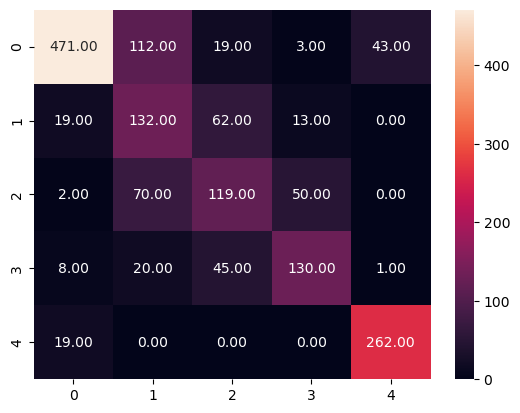

In [55]:
sns.heatmap(confusion_matrix(lr_predictions,y_test),annot=True,fmt='.2f')

## KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn=KNeighborsClassifier()

In [58]:
param_grid={'n_neighbors':list(range(1,7))}

In [59]:
knn=GridSearchCV(knn,param_grid,cv=5,scoring="accuracy")

In [60]:
knn.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6]},
             scoring='accuracy')

In [61]:
knn_predictions=knn.predict(X_test)

In [62]:
accuracy_score(knn_predictions,y_test)

0.620625

<AxesSubplot: >

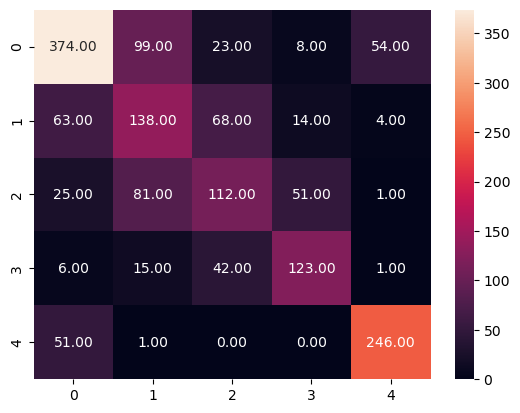

In [63]:
sns.heatmap(confusion_matrix(knn_predictions,y_test),annot=True,fmt='.2f')

## SVM

In [64]:
from sklearn.svm import SVC

In [65]:
svm=SVC()

In [66]:
param_grid={'kernel':['linear', 'rbf'],"C":[0.25,0.5,1,1.5,2]}

In [67]:
svm=GridSearchCV(svm,param_grid,cv=5)

In [68]:
svm.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.25, 0.5, 1, 1.5, 2],
                         'kernel': ['linear', 'rbf']})

In [69]:
svm_predictions=svm.predict(X_test)

In [70]:
accuracy_score(svm_predictions,y_test)

0.8

<AxesSubplot: >

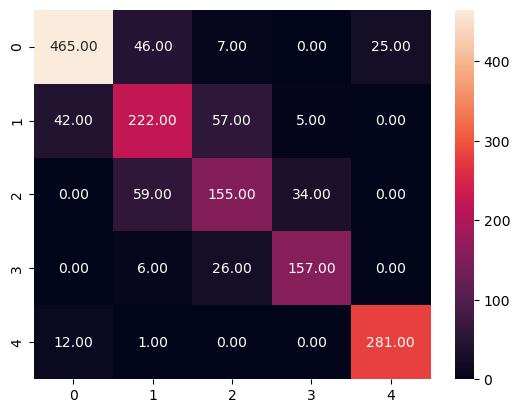

In [71]:
sns.heatmap(confusion_matrix(svm_predictions,y_test),annot=True,fmt='.2f')

## RandomForest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rfc=RandomForestClassifier()

In [74]:
n_estimators=[150,200,250,275,300,350,400]
max_features= [1,2,3,4,5]
bootstrap = [True]

In [75]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}  # Note, oob_score only makes sense when bootstrap=True!

In [76]:
rfc= GridSearchCV(rfc,param_grid,cv=5)

In [77]:
rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_features': [1, 2, 3, 4, 5],
                         'n_estimators': [150, 200, 250, 275, 300, 350, 400]})

In [78]:
rfc_predictions=rfc.predict(X_test)

In [79]:
accuracy_score(rfc_predictions,y_test)

0.791875

<AxesSubplot: >

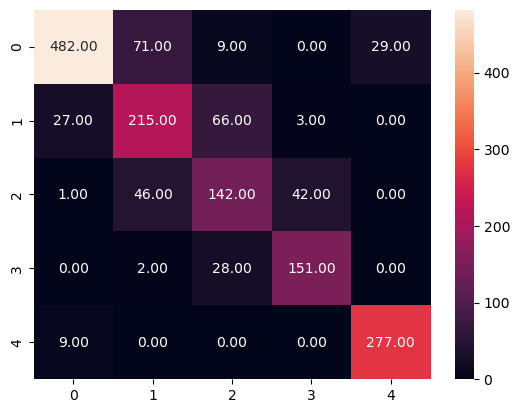

In [80]:
sns.heatmap(confusion_matrix(rfc_predictions,y_test),annot=True,fmt='.2f')

## GradientBoostingClassifier

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
gbc=GradientBoostingClassifier()

In [83]:
param_grid = {"n_estimators":[2,3,4,5,6,7,8,9,10,11,12],'max_depth':[1,2,3,4]}

In [84]:
gbc = GridSearchCV(gbc,param_grid,cv=5)

In [85]:
gbc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

In [86]:
gbc_predictions=gbc.predict(X_test)

In [87]:
accuracy_score(gbc_predictions,y_test)

0.7925

<AxesSubplot: >

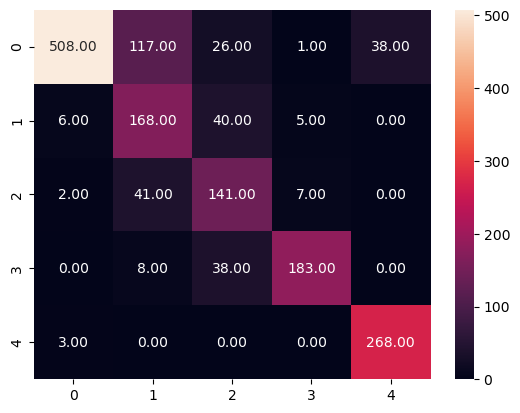

In [88]:
sns.heatmap(confusion_matrix(gbc_predictions,y_test),annot=True,fmt='.2f')

## XGBoost

In [89]:
from xgboost import XGBClassifier

In [90]:
xgb=XGBClassifier()

In [91]:
param_grid={"n_estimators":[100,150,200,250,300,350,400],'max_depth': [2,3, 4, 5]}

In [92]:
xgb=GridSearchCV(xgb,param_grid,cv=5)

In [93]:
xgb.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400]})

In [94]:
xgb_predictions=xgb.predict(X_test)

In [95]:
accuracy_score(xgb_predictions,y_test)

0.951875

<AxesSubplot: >

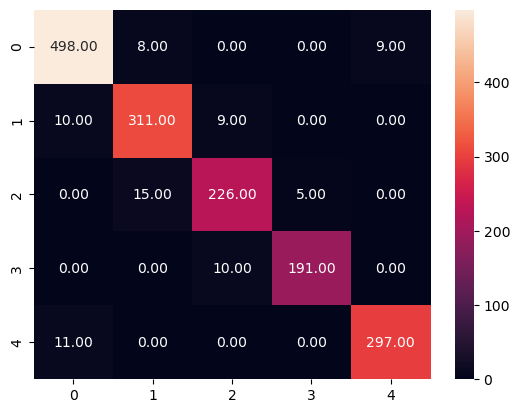

In [96]:
sns.heatmap(confusion_matrix(xgb_predictions,y_test),annot=True,fmt='.2f')

In [97]:
xgb.fit(X,y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400]})

In [105]:
#Changing the ordering of columns of test to match to X
test=test.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,26,32,33,34,12,13,14,27,28,29,30,31,35,15,16,17,18,19,20,21,22,23,24,25]]

In [114]:
predictions=xgb.predict(test)

In [115]:
predictions

array([3, 3, 3, ..., 0, 0, 0])

In [116]:
predictions=pd.DataFrame(predictions)

In [118]:
predictions.columns=["RH_type"]

In [120]:
predictions["RH_type"]=predictions["RH_type"].map({0:"Ideal",1:"Slightly Elevated",2:"Elevated",3:"High",4:"Dry"})

In [122]:
temp=pd.read_csv("/Users/rohithsiddi/Desktop/Chemical_Intelligence/Test_Data.csv")

In [125]:
predictions["id"]=temp["id"]

In [127]:
predictions=predictions.iloc[:,[1,0]]

In [128]:
predictions

,id,RH_type
0,1,High
1,2,High
2,3,High
3,4,High
4,5,High
...,...,...
1352,1353,Ideal
1353,1354,Ideal
1354,1355,Ideal
1355,1356,Ideal


In [129]:
predictions.to_csv("Predictions.csv")